### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 11</span>

### Scopo
Lo scopo di questa esercitazione è quello di impratichirsi nell'utilizzo delle reti neurali NN. Per far ciò, partiamo dall'esempio semplice della regressione lineare che dipende dal numero di epoche,  $N_{epochs}$, il numero di dati  $N_{train}$ e il rumore $\sigma$.

Per prima cosa, generiamo alcuni punti casualmente disposti lungo una linea retta e poi useremo il training e la validazione delle reti neurali NN.

In [24]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [25]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 100)
x_valid = np.random.uniform(-1, 1, 10)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

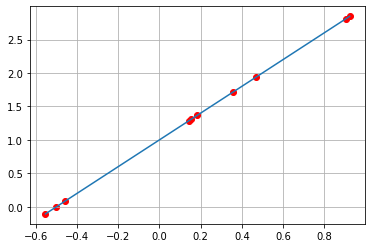

In [26]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Sopra è riportato il grafico che rappresenta i punti validati tramite fit lineare ( regressione lineare) in quanto il rumore $\sigma=0$. 

Se si ricorda come funziona un singolo nodo di una rete neurale, puoi facilmente individuare che solo un singolo neurone può svolgere il lavoro. 

Iniziamo quindi con un semplice modello sequenziale con solo uno strato su un solo neurone:

In [27]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import backend as K
from keras.utils import get_custom_objects

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

model = keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Cercheremo ora di addestrare il nostro modello, ossia alimenteremo il nostro neurone con la coppia di addestramento x e y_train, da cui l'ottimizzatore troverà i pesi migliori per minimizzare la funzione di perdita di errore quadratico medio (funzione di regressione lineare out).
Useremo solo un nodo perchè vogliamo riprodurre la funzione lineare.

In [28]:
# fit the model using training dataset
# over 30 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 0s 26ms/step - loss: 2.6540 - mse: 2.6540 - val_loss: 3.2438 - val_mse: 3.2438
Epoch 2/30
4/4 [==============================] - 0s 5ms/step - loss: 2.4881 - mse: 2.4881 - val_loss: 2.9516 - val_mse: 2.9516
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 2.2856 - mse: 2.2856 - val_loss: 2.7194 - val_mse: 2.7194
Epoch 4/30
4/4 [==============================] - 0s 5ms/step - loss: 2.1291 - mse: 2.1291 - val_loss: 2.5572 - val_mse: 2.5572
Epoch 5/30
4/4 [==============================] - 0s 5ms/step - loss: 2.0108 - mse: 2.0108 - val_loss: 2.4023 - val_mse: 2.4023
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 1.9008 - mse: 1.9008 - val_loss: 2.2092 - val_mse: 2.2092
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 1.7656 - mse: 1.7656 - val_loss: 2.0380 - val_mse: 2.0380
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 1.6458 - mse: 1.6458 - val_loss: 

Un modello addestrato contiene pesi adattati per ogni strato. Possiamo ispezionare i pesi da ogni strato usando il metodo get_weights, che restituisce un array di due array: i primi sono i pesi che appartengono all'input del layer, i secondi sono i pesi associati al bias del layer.

 

In [29]:
# return weights
model.get_weights()

[array([[0.84813905]], dtype=float32), array([0.82481396], dtype=float32)]

Dai dati ottenuti sopra abbiamo che m=0.85 (coeff.angolare) e b=0.82 (termine noto) che differiscono di molto dai dati di partenza. Ciò significa che la rete NN ha lavorato male. Per far performare meglio la rete potrei aumentare il numero dei dati sopra.

In [30]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 2ms/step - loss: 0.4770 - mse: 0.4770

Test loss: 0.4769996702671051
Test accuracy: 0.4769996702671051


In [31]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 3ms/step - loss: 0.4770 - mse: 0.4770

Test loss: 0.4769996702671051
Test accuracy: 0.4769996702671051


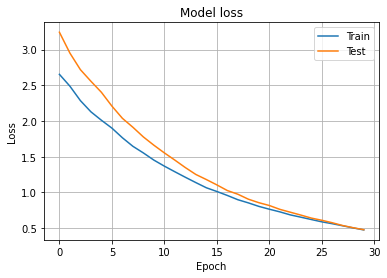

In [32]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

Il metodo di previsione (the **predict** method) genera la previsione dell'output da un modello fornito del set di dati di input. 

Quando si esegue una previsione, i campioni in un batch vengono elaborati in modo indipendente, in parallelo, quindi più grande è il batch, più l'attività di previsione verrà completata.

Input dataset shape:  (10,)
Predicted results shape:  (100, 1)


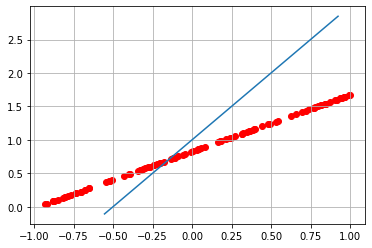

In [37]:
print("Input dataset shape: ", x_valid.shape)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
print("Predicted results shape: ", y_predicted.shape)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Se utilizziamo solo 30 generazioni con una batch size=32 non otteniamo buoni risultat. Infatti la nostra NN non riesce ad interpolare correttamente i punti che vengono generati casualmente.

Nel corso dell'esercitazione "giocheremo" quindi con le reti neurali facendo diverse prove in cui varieremo parametri diversi.

Ad esempio, di seguito aumenteremo il numero di epoche:

**AUMENTO NUMERO DI EPOCHE**

In [39]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=70,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)


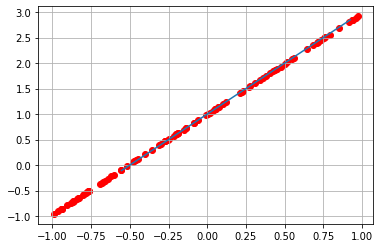

In [40]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Aggiungendo 70 epoche (in totale 100 epoche) le reti neurali fittamo bene i punti. Il training è molto rapido (pochi secondi) possiamo quindi allenare le NN per più epoche, ad esempio ne aggiungiamo altre 50.

In [41]:
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

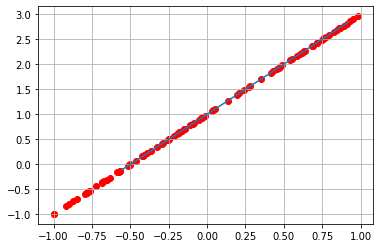

In [42]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Osserviamo che i risultati migliorano, ciò è confermato dal fatto che la loss e l'accuratezza diminuiscono.

1/1 [==============================] - 0s 2ms/step - loss: 1.7392e-05 - mse: 1.7392e-05

Test loss: 1.7392445442965254e-05
Test accuracy: 1.7392445442965254e-05


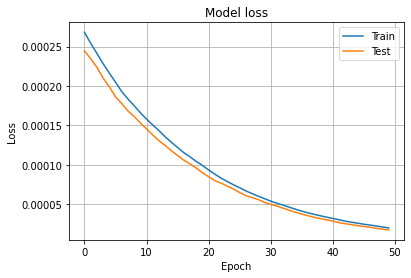

In [44]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

**AUMENTO NUMERO DI DATI**

Aumenteremo ora il numero di dati che utilizziamo per il training e il test  dell'NN. 

Manterremo il numero di epoche fissato a 30 e useremo 500 punti per il training e 50 per la validazione.



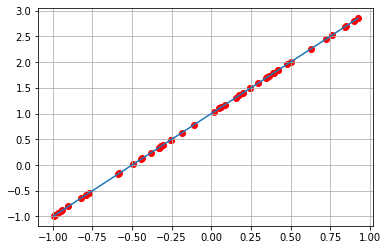

In [45]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0. # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()


Ora resettiamo le reti neurali e ripetiamo il training per 30 epoche e size_batch=32 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


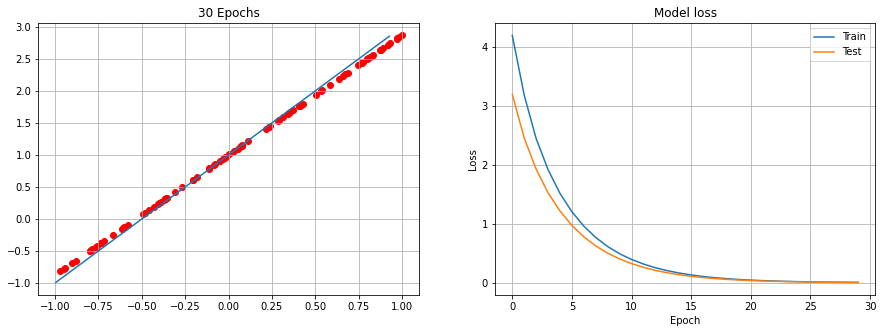

In [47]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Dal grafico riportato sopra otteniamo che dopo 30 epoche i dati sono ben fittati dalla retta blu. 

La loss è 3-5 volte maggiore di quella che abbiamo ottenuto nel caso precedente con solo 100 dati per il training. Il fatto di aver usato solo 30 epoche al posto di 150 è importante. La riduzione del numero di epoche in problemi più complicati porterà ad un notevole risparmio di tempo.

**RUMORE**

Vedremo ora cosa accade se i punti per il training e la validazione non provengono da una linea perfetta.

Partiremo utilizzando 500 punti per il training perchè abbiamo visto che questo porta ad un miglioramento nel tempo di addestramento. 


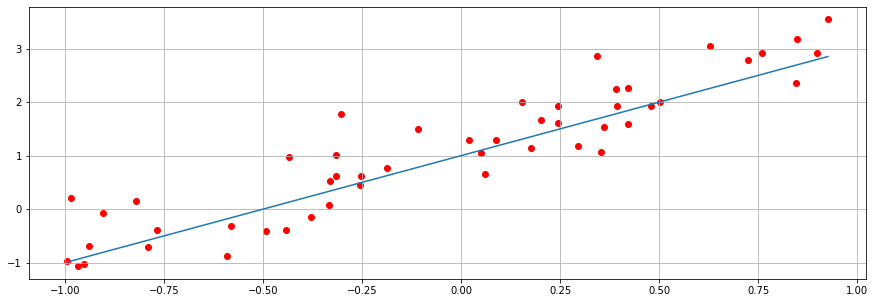

In [48]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


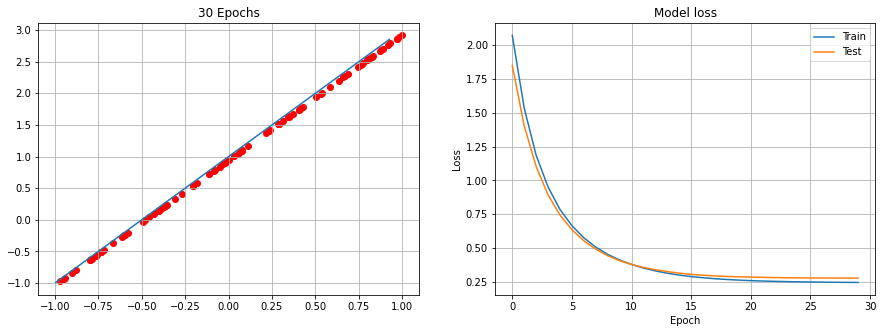

In [50]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid), verbose=0)

plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Dal grafico precedente si osserva che i punti si adattano ad una disposizione lungo una linea retta anche se c'è rumore $\sigma=0.5$ perchè questa è l'unica possibilità per come abbiamo costruito la NN.

Dopo 30 epoche, i risultati che abbiamo ottenuto sono piuttosto buoni considerando che i dati questa volta contengono errore. Se aumentiamo il rumore, a parità di epoche otteniamo previsioni peggiori.



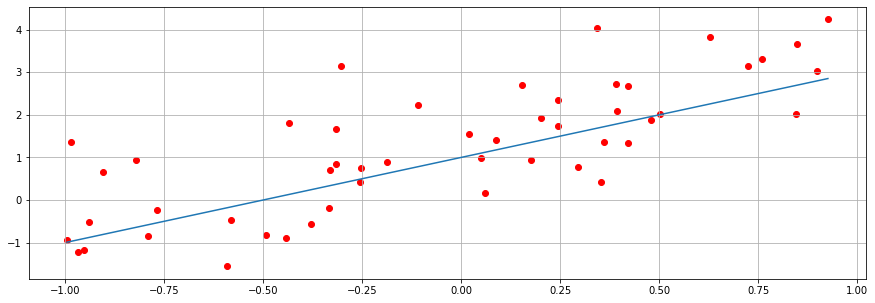

In [51]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 1.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

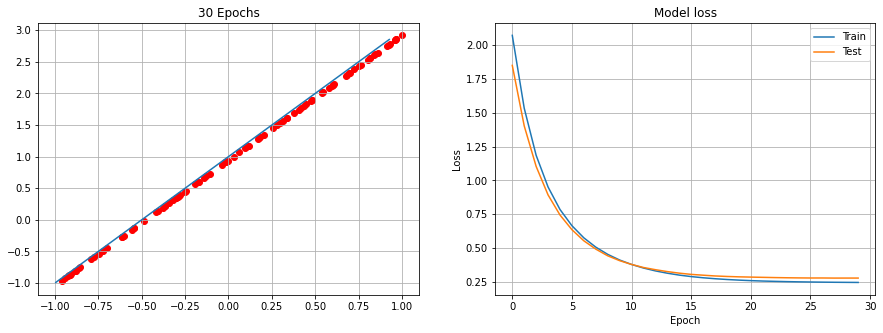

In [54]:
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots(1,2)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[0].scatter(x_predicted, y_predicted,color='r')
ax[0].plot(x_valid, y_target)
ax[0].grid(True)
ax[0].set_title('30 Epochs')

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=0)

# look into training history
# Plot training & validation loss values
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Test'], loc='best')
ax[1].grid(True)
plt.show()

Anche se i punti si trovano in una linea che sembra riprodurre la linea y = 2x + 1, la previsione è peggiore del caso con $\sigma = 0,5$ come possiamo vedere dalla loss di prova e dalla precisione del test.

**CONCLUSIONE**

Da quanto sperimentato sulle reti neurali NN in questa esercitazione possiamo dire che se il tempo di training per ogni epoca è breve possiamo aumentare il numero di epoche di queste reti. Ossia nei casi in cui abbiamo un numero limitato di parametri da ottimizzare o quando non possiamo generare un numero qualsiasi di dati. Altrimenti è meglio aumentare nelle reti neurali il numero di dati di training e di validazione.

